<a href="https://colab.research.google.com/github/foudroyeur24/Projet_maths/blob/main/ProjetMath.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import statsmodels.api as sm

# BDD
data2014 = pd.read_csv("seismes_2014.csv")
dataOther = pd.read_csv("OtherEvent1900To2023.csv")
data10years = pd.read_csv("10yearsOfHugeSismicActivity.csv")
dataSup6 = pd.read_csv("Sup6From1900To2023.csv")
mapbox_token = 'pk.eyJ1Ijoic2hha3VuOSIsImEiOiJjbGljdWJ1ZjcwbWxiM3NtbzNyYWh1c3kzIn0.A8nMixa9JlGZUyY-YZaABg'

In [27]:
filtered_data = data2014[data2014['mag'] < 5] # filtred data for < 5 only

continuous_color_scale="rdgy"
# Carte de chaleur des séismes
fig = px.density_mapbox(filtered_data, lat='lat', lon='lon', z='mag', radius=2,
                        center=dict(lat=0, lon=0), zoom=0,
                        mapbox_style='satellite', title='Carte de chaleur des séismes de magnitude inférieur a 5')
fig.update_layout(mapbox=dict(accesstoken=mapbox_token))
fig.show()

In [28]:
# color palette
palette = {
    3: 'hotpink',
    4: 'green',
    5: 'chocolate',
    6: 'blue',
    7: 'red',
    8: 'black'
}

filtered_data = data2014[(data2014['mag'] >= 5) & (data2014['mag'] <= 10)] # filtred data for btw 5 and 10
mag = int(filtered_data['mag'].iloc[3])

fig = px.scatter_mapbox(filtered_data,lat='lat', lon='lon', color='mag', size=10 + 10 * (filtered_data['mag'] - 5),
                        center=dict(lat=0, lon=0), zoom=0,
                        mapbox_style='streets', title='Carte des points des séismes par rapport a leur magnitude comprise entre 5 et 10',
                        color_continuous_scale=list(palette.values()))  # Utiliser la palette de couleurs

fig.update_layout(mapbox=dict(accesstoken=mapbox_token))
fig.show()



In [29]:
filtered_data = data2014[(data2014['mag'] >= 5) & (data2014['mag'] <= 10)]
# natural earth --> circular
fig = px.scatter_geo(filtered_data, lat='lat', lon='lon',
                     projection='natural earth',
                     title='Carte circulaire des séismes en fonction de leur magnitude',
                     color_continuous_scale='rdgy')

fig.update_geos(showcountries=True, countrycolor="gray")
fig.update_layout(geo=dict(showland=True, landcolor="lightgray"))

fig.update_traces(marker=dict(size=5))
fig.update_layout(mapbox=dict(accesstoken=mapbox_token))
fig.show()

Pie chart

  magnitude  count
0        -1    104
1         0  15366
2         1  48347
3         2  29090
4         3   8602
5         4  12325
6         5   5751
7        >6    480


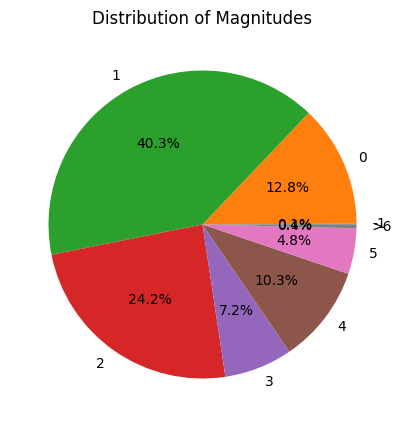

In [30]:
distribution = data2014['mag'].value_counts().reset_index()
distribution.columns = ['magnitude', 'count']
distribution['magnitude'] = distribution['magnitude'].round().astype(int)

# Merg  magnitudes 6, 7, 8, and 9 into a single category bc if not they superpose
distribution.loc[distribution['magnitude'].between(6, 9), 'magnitude'] = '>6'
distribution = distribution.groupby('magnitude')['count'].sum().reset_index()

print(distribution)
distribution_value = distribution['count'].values[0]  # get value magnitude
# Extract labels and values from the distribution
labels = distribution['magnitude'].astype(str).tolist()
values = distribution['count'].tolist()
# plot fig
fig, ax = plt.subplots(figsize=(5, 5))
pie = ax.pie(values, labels=labels, autopct='%1.1f%%')

ax.set_title("Distribution of Magnitudes")


plt.show()


TEST PARAMETRIQUE DE COMPARAISON 


BDD des plus gros seisme >5 mag depuis 10 ans 
TOP 10 des pays les plus fréquement touché par des seisme > 5 depuis 10 ans 
TOP 10 des pays avec les seismes les + fort en magnitudes depuis 10 ans
TOP 10 des plus gros seisme depuis 10 ans 
les mois les plus propices aux seismes 


Pays les plus dangereux (avec le + de seisme supérieur a 6)

In [31]:
data = pd.read_csv("seismes_2014.csv") # 2014
data2 = pd.read_csv("earthquakes.csv") # 2016
data3 = pd.read_csv("10yearsOfHugeSismicActivity.csv") # 2013 --> 2023

# all top 10 country from 3 db
top_10_pays_data1 = data[data['mag'] > 6].groupby('pays').size().nlargest(10)
print(top_10_pays_data1 )
top_10_pays_data2 = data2[data2['impact.magnitude'] > 6].groupby('location.full').size().nlargest(10)
print(top_10_pays_data2)
top_10_pays_data3 = data3[data3['mag'] > 5].groupby('place').size().nlargest(10)
print(top_10_pays_data3)

compiled_data = top_10_pays_data1+top_10_pays_data2+top_10_pays_data3 # merge data (not used)
# create map
filtered_data3 = data3[data3['place'].isin(top_10_pays_data3.index)]
fig = px.scatter_geo(filtered_data3, lat='latitude', lon='longitude',
                     projection='natural earth',
                     title='Carte des zones rassemblant les seismes majeurs de ces 10 dernières années',
                     color_continuous_scale='rdgy')

fig.update_geos(showcountries=True, countrycolor="black")
fig.update_layout(geo=dict(showland=True, landcolor="antiquewhite"))

fig.update_traces(marker=dict(size=5), fillcolor = "red")
fig.update_layout(mapbox=dict(accesstoken=mapbox_token))
fig.show()

pays
Chile             12
PapuaNewGuinea    10
Indonesia          7
Japan              7
Mexico             7
NewZealand         7
Alaska             5
SolomonIslands     5
Vanuatu            5
Philippines        4
dtype: int64
location.full
South Georgia Island region                      2
109km E of Ile Hunter, New Caledonia             1
10km SE of Norcia, Italy                         1
25km W of Chauk, Burma                           1
28km SSW of Agrihan, Northern Mariana Islands    1
53km NW of Abra Pampa, Argentina                 1
70km ENE of Iwo Jima, Japan                      1
South Indian Ocean                               1
South of the Fiji Islands                        1
dtype: int64
place
South Sandwich Islands region       562
Kermadec Islands region             318
Kermadec Islands, New Zealand       188
southeast of the Loyalty Islands    166
Pacific-Antarctic Ridge             142
south of the Fiji Islands           135
southern Mid-Atlantic Ridge         127


In [32]:
data = pd.read_csv("seismes_2014.csv") # 2014
data2 = pd.read_csv("earthquakes.csv") # 2016
data3 = pd.read_csv("Sup6From1900To2023.csv") # 2013 --> 2023
data4 = pd.read_csv("10yearsOfHugeSismicActivity.csv") # 2000 --> 2023

# like about all top 10 country but for >6 this time
top_10_pays_data1 = data[data['mag'] > 6].groupby('pays').size().nlargest(10)
print(top_10_pays_data1 )
top_10_pays_data2 = data2[data2['impact.magnitude'] > 6].groupby('location.full').size().nlargest(10)
print(top_10_pays_data2)
top_10_pays_data3 = data3[data3['mag'] > 6].groupby('place').size().nlargest(10)
print(top_10_pays_data3)
top_10_pays_data4 = data4[data4['mag'] > 5].groupby('place').size().nlargest(10)
print(top_10_pays_data4)

compiled_data = top_10_pays_data1+top_10_pays_data2+top_10_pays_data3 # not used
# create map
filtered_data3 = data4[data4['place'].isin(top_10_pays_data4.index)]
fig = px.scatter_geo(filtered_data3, lat='latitude', lon='longitude',
                     projection='natural earth',
                     title='Carte des zones rassemblant les seismes majeurs de ces 10 dernières années',
                     color_continuous_scale='rdgy')

fig.update_geos(showcountries=True, countrycolor="black")
fig.update_layout(geo=dict(showland=True, landcolor="antiquewhite"))

fig.update_traces(marker=dict(size=5), fillcolor = "red")
fig.update_layout(mapbox=dict(accesstoken=mapbox_token))
fig.show()

pays
Chile             12
PapuaNewGuinea    10
Indonesia          7
Japan              7
Mexico             7
NewZealand         7
Alaska             5
SolomonIslands     5
Vanuatu            5
Philippines        4
dtype: int64
location.full
South Georgia Island region                      2
109km E of Ile Hunter, New Caledonia             1
10km SE of Norcia, Italy                         1
25km W of Chauk, Burma                           1
28km SSW of Agrihan, Northern Mariana Islands    1
53km NW of Abra Pampa, Argentina                 1
70km ENE of Iwo Jima, Japan                      1
South Indian Ocean                               1
South of the Fiji Islands                        1
dtype: int64
place
South Sandwich Islands region       159
Kermadec Islands region             144
Kermadec Islands, New Zealand       115
south of the Fiji Islands           101
central Mid-Atlantic Ridge           81
Fiji region                          79
southeast of the Loyalty Islands     78


Mois les plus propices aux seismes 

In [33]:
#data = pd.read_csv("10yearsOfHugeSismicActivity.csv")
data = pd.read_csv("Sup6From1900To2023.csv")
data['day'] = pd.to_datetime(data['time']).dt.day

daily_counts = data.groupby('day').size() # colunt day
daily_data = pd.DataFrame({'Day': daily_counts.index, 'Seismic Count': daily_counts.values})

daily_data = daily_data.sort_values('Day')
fig = px.bar(daily_data, x='Day', y='Seismic Count', labels={'Day': 'Jour', 'Seismic Count': 'Nombre de séismes'})

fig.update_layout(title='Nombre de séismes par jours depuis 1900')

fig.show()


In [34]:
dataSup6['month'] = pd.to_datetime(dataSup6['time']).dt.month

monthly_counts = dataSup6.groupby('month').size() # count month 
monthly_dataSup6= pd.DataFrame({'Month': monthly_counts.index, 'Seismic Count': monthly_counts.values})

monthly_dataSup6= monthly_dataSup6.sort_values('Month')
fig = px.bar(monthly_dataSup6, x='Month', y='Seismic Count', labels={'Month': 'Mois', 'Seismic Count': 'Nombre de séismes'})

fig.update_layout(title='Nombre de séismes par mois depuis 1900')

fig.show()


In [35]:
data = pd.read_csv("10yearsOfHugeSismicActivity.csv")
# average magnitude by country
avg_magnitude_by_country = data.groupby('place')['mag'].mean()
# get top n country with most magnitude
top_10_countries = avg_magnitude_by_country.nlargest(20) # for n = 20
top_10_data = pd.DataFrame({'Lieux': top_10_countries.index, 'Magnitude Moyenne': top_10_countries.values}) # dataframe
fig = px.bar(top_10_data, x='Lieux', y='Magnitude Moyenne', labels={'Lieux': 'Lieux', 'Magnitude Moyenne': 'Magnitude Moyenne'}) # bar plot
fig.update_layout(title='Les lieux avec les magnitudes moyennes les plus élevées sur les 10 dernières années')
fig.show()


Seisme by years

In [36]:
# Bar chart
dataSup6['year'] = pd.to_datetime(dataSup6['time']).dt.year
year_counts = dataSup6.groupby('year').size() # data count
year_dataSup6 = pd.DataFrame({'Year': year_counts.index, 'Seismic Count': year_counts.values}) # get year data
year_dataSup6 = year_dataSup6.sort_values('Year')
fig_bar = px.bar(year_dataSup6, x='Year', y='Seismic Count', labels={'Year': 'Année', 'Seismic Count': 'Nombre de séismes'}) 
fig_bar.update_layout(title='Nombre de séismes de magnitude supérieure à 6 par an depuis 1900')

# Map visualization
filtered_data = dataSup6[dataSup6['mag'] > 6]  # Filter earthquakes with magnitude greater than 6
fig_map = px.scatter_mapbox(filtered_data, lat='latitude', lon='longitude', hover_name='place',
                            color='mag', color_continuous_scale='rdgy',
                            mapbox_style="open-street-map", zoom=1)

fig_map.update_layout(title='Répartition géographique des séismes de magnitude supérieure à 6 depuis 1900')
# Display both charts
fig_bar.show()
fig_map.show()

In [37]:
dataSup6['year'] = pd.to_datetime(dataSup6['time']).dt.year
year_counts = dataSup6.groupby('year').size()
year_dataSup6 = pd.DataFrame({'Year': year_counts.index, 'Seismic Count': year_counts.values})
year_dataSup6 = year_dataSup6.sort_values('Year')

# Linear regresion
X = sm.add_constant(year_dataSup6['Year'])
y = year_dataSup6['Seismic Count']

# Ajust linear regresion
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          Seismic Count   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     185.0
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           3.86e-26
Time:                        07:32:55   Log-Likelihood:                -578.13
No. Observations:                 123   AIC:                             1160.
Df Residuals:                     121   BIC:                             1166.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1705.0587    133.634    -12.759      0.0

Profondeur moyenne des séismes

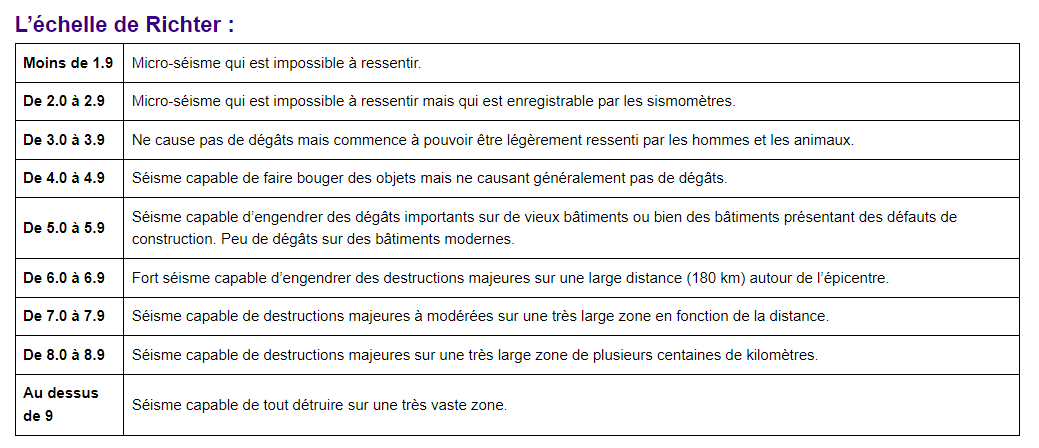

Test statistiques

In [38]:
# comparaison with mining explosion this has not been keep at the final because mining explosion db is not enough complet
mining_explosions = dataOther[dataOther['type'] == 'mining explosion']

mining_explosions['date'] = pd.to_datetime(mining_explosions['time'])
seismes2014['date'] = pd.to_datetime(seismes2014['instant'])

merged_data = pd.concat([mining_explosions, seismes2014], axis=1)

if len(merged_data) >= 2:
    corr, _ = pearsonr(merged_data['type'].apply(lambda x: 1 if x == 'mining explosion' else 0), merged_data['pays'].apply(lambda x: 1 if pd.notnull(x) else 0)) # correlation
    print(corr)
else:
    print("Insufficient data for correlation calculation.")


<ipython-input-38-20afba0f0a9b>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0.006123417229753377
